# Reakcja na COVID-19 wśród młodieży uczącej się

## Wstęp
Dane, które opracowywaliśmy pochodzą z dostępnego na stronie Kaggle.com datasetu zestawiającego informacje na temat wpływu pandemii COVID-19 na uczniów i studentów w Indiach. (https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students)

Zbiór danych zawiera 1182 wpisy, z których, po odrzuceniu osób ze zbędnych przedziałów wiekowych, będziemy analizować 983.

W danych wypisane są kolumny takie jak:
- ID
- Region zamieszkania
- Wiek badanego
- Czas spędzony na e-lekcjach [h/d]
- Ocena e-lekcji [bardzo słabe, słabe, średnie, dobre, wyśmienite]
- Urządzenie wykorzystywane w czasie e-lekcji [komputer, smartfon, tablet]
- Czas spędzony na samokształceniu [h/d]
- Czas spędzony na aktywności fizycznej [h/d]
- Czas spędzony na spaniu [h/d]
- Czas spędzony na mediach społecznościowych [h/d]
- Preferowana platforma społecznościowa [odpowiedź pisemna]
- Czas spędzony na oglądaniu telewizji [h/d]
- Ilość posiłków na dzień
- Zmiana w wadze ciała [spadek, brak zmiany, wzrost]
- Problemy zdrowotne w czasie lockdownu [tak/nie]
- Czynności odstresowujące [odpowiedź pisemna]
- Czy jesteś zadowolony/a ze spędzonego przez siebie czasu? [tak/nie]
- Czy czujesz się lepiej zintegrowany/a z rodziną, przyjaciółmi i znajomymi? [tak/nie]
- Za czym najbardziej tęsknisz? [odpowiedź pisemna]

## Importowanie bibliotek, wczytanie danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("COVID-19_Survey_Student_Responses.csv")

In [2]:
dataset

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


## Rozeznanie się w kategoriach wiekowych badanych

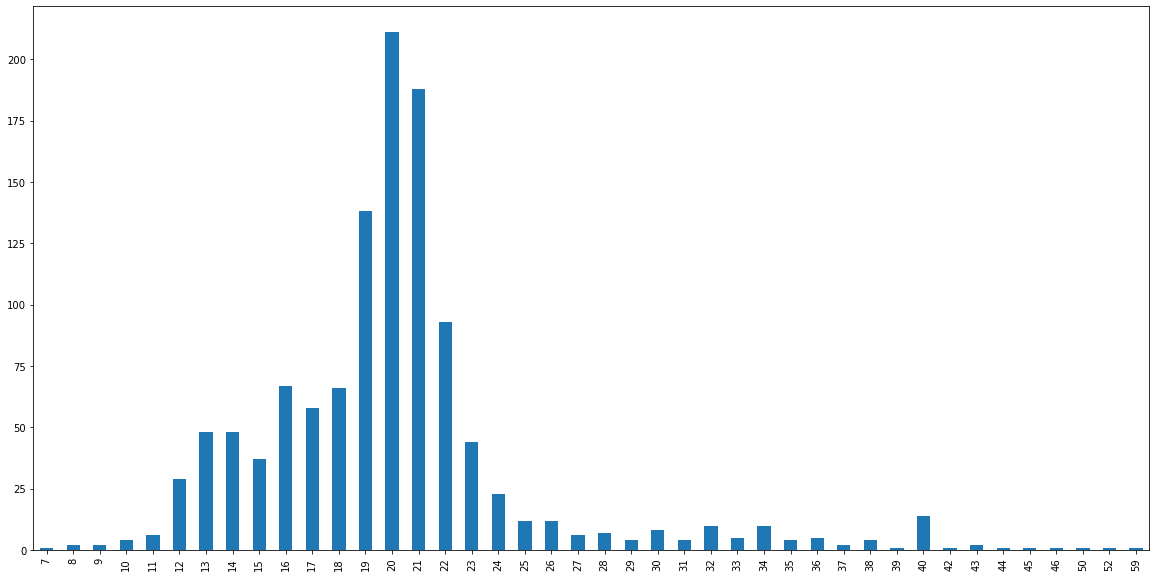

In [3]:
dataset['Age of Subject'].value_counts().sort_index().plot(figsize=(20,10), kind='bar')
plt.show()

## Przypisanie kategorii wiekowej na bazie wieku, odrzucenie osób zbyt młodych i zbyt starych

Zdecydowaliśmy podzielić badanych na cztery kategorie wiekowe:
- "Younger adolescents", a więc młodsi nastolatkowie, opisują osoby w wieku od 12 do 15 lat, a więc około późnej szkoły podstawowej
- "Older adolescents", starsi nastolatkowie, osoby w wieku od 16 do 18 lat, czyli okolice wieku licealnego
- "Younger students", młodsi studenci, osoby z przedziału wiekowego 19-20 lat, a więc studenci pierwszych lat
- "Older students", starsi studenci, osoby z przedziału wiekowego 21-22 lata, a więc studenci ostatnich lat podstawowego toku studiowania

Wynika to głównie ze zmiany osobowości i zainteresowań człowieka w podanych okresach oraz liczności poszczególnych roczników wśród badanych.

In [4]:
df = pd.DataFrame(dataset[
                      (12 <= dataset['Age of Subject'])
                    & (dataset['Age of Subject'] < 23)
                  ])

def get_age_category(age: int):
    if 12 <= age < 16:
        return 'Younger adolescents'
    elif 16 <= age < 19:
        return 'Older adolescents'
    elif 19 <= age < 21:
        return 'Younger students'
    elif 21 <= age < 23:
        return 'Older students'
    return 'NA'

age_categories = ['Younger adolescents', 'Older adolescents', 'Younger students', 'Older students']
df['Age Category'] = pd.Categorical(df['Age of Subject'].map(get_age_category), categories=age_categories, ordered=True)

df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Age Category
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college,Older students
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely,Older students
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling,Younger students
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives",Younger students
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling,Older students
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling,Younger adolescents
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives",Younger adolescents
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college,Younger adolescents
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college,Younger adolescents


## Obsłużenie pustych komórek

Na początku sprawdzone zostały ilości pustych komórek - nie było ich dużo, a opisywane przez nie wartości były ciężkie do uzupełnienia. W związku z tym padła decyzja o usunięciu rekordów zawierających puste wartości.

In [5]:
print(df.isna().sum())

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     17
Medium for online class                                                               38
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

Usuwane komórki nie uderzą szczególnie w żadną kategorię wiekową

In [6]:
df[df.isna().any(axis=1)]['Age Category'].value_counts()

Older students         16
Younger students        9
Older adolescents       8
Younger adolescents     5
Name: Age Category, dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

## Sprawdzenie duplikatów - brak duplikatów

In [8]:
df['ID'].duplicated().any()

False

## Typy danych - szukanie nieprawidłowości

In [9]:
df.dtypes

ID                                                                                      object
Region of residence                                                                     object
Age of Subject                                                                           int64
Time spent on Online Class                                                             float64
Rating of Online Class experience                                                       object
Medium for online class                                                                 object
Time spent on self study                                                               float64
Time spent on fitness                                                                  float64
Time spent on sleep                                                                    float64
Time spent on social media                                                             float64
Prefered social media platform                    

Zbadanie problemów w kolumnie "Czas spędzony na oglądaniu telewizji"

In [10]:
def is_number(element: str):
    return sum(map(lambda c: c.isnumeric() or c == '.', element)) == len(element) and len(element) != 0

notnum_mask = ~df['Time spent on TV'].map(is_number)
df['Time spent on TV'][notnum_mask]

18          n
106         N
111         N
194     No tv
269         N
282         N
545     No tv
616          
751          
1040        N
Name: Time spent on TV, dtype: object

Odpowiedzi wskazujące brak telewizora zostały zreintepretowane na 0 godzin spędzonych na oglądaniu

In [11]:
df['Time spent on TV'] = pd.to_numeric(df['Time spent on TV'], errors='coerce').fillna(0)

## Porządkowanie zmiennej kategorycznej dla oceny e-lekcji

In [12]:
df['Rating of Online Class experience'].unique()

array(['Good', 'Excellent', 'Very poor', 'Average', 'Poor'], dtype=object)

In [13]:
rating_categories = ['Very poor', 'Poor', 'Average', 'Good', 'Excellent']
df['Rating of Online Class experience'] = df['Rating of Online Class experience'].astype(pd.CategoricalDtype(rating_categories , ordered=True))

# Analiza

## Nauka
Analizę rozpoczynamy od oceny e-lekcji przez ogół badanych.

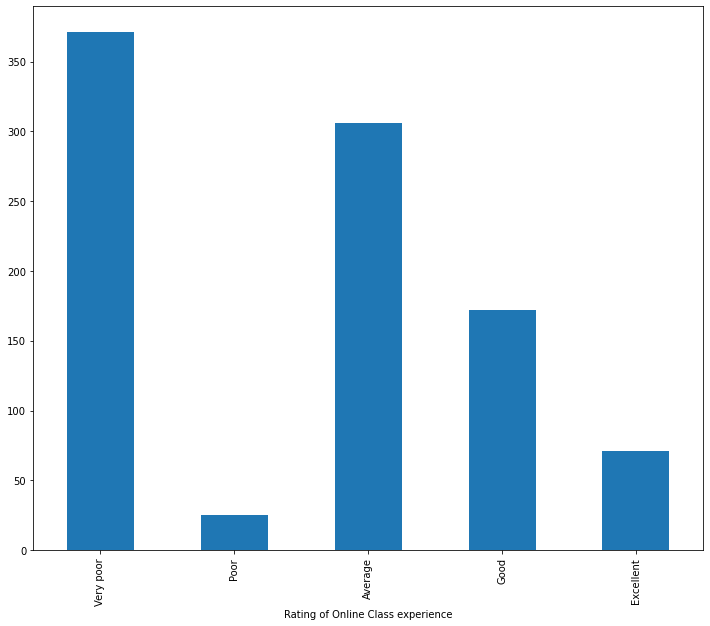

In [14]:
df\
    .groupby(['Rating of Online Class experience'])\
    .size()\
    .plot(figsize=(12, 10), kind='bar')
plt.show()

Hinduska młodzież nie jest zbyt zadowolona ze swoich lekcji w formie online. W oczy rzuca się ogromna ilość opini skrajnie negatywnych. Duża część badanych ma na temat e-lekcji opinię neutralną. Recenzje pozytywne są w zdecydowanej mniejszości.

Zbadamy teraz opinię na temat e-lekcji w zależności od kategorii wiekowej

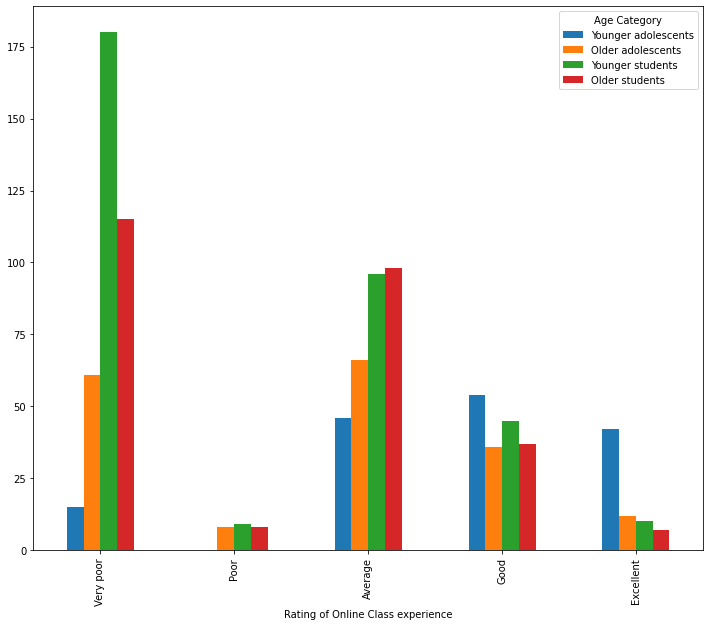

In [15]:
df\
    .groupby(['Age Category', 'Rating of Online Class experience'])\
    .size()\
    .unstack(0)\
    .plot(figsize=(12, 10), kind='bar')
plt.show()

Na podstawie liczebności poszczególnych ocen w kolejnych grupach wiekowych można zauważyć kilka rzeczy:
- najmłodsi byli najbardziej zadowoleni z przebiegu lekcji w formie zdalnej
- oceny negatywne przeważają w grupie studentów - zwłaszcza ci młodsi mieli wygórowane oczekiwania
- każda grupa wiekowa preferowała ocenę skrajnie negatywną od umiarkowanie negatywnej

Interesującą nas zależności było również przekładania się obecności na zajęciach na ich ocenę.

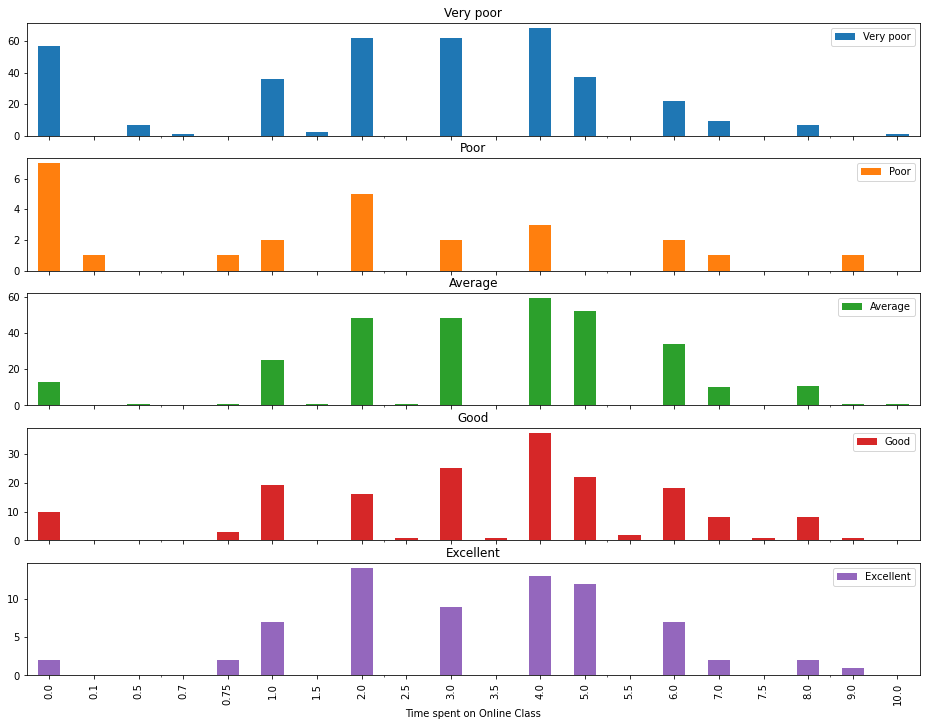

In [16]:
df\
    .groupby(['Rating of Online Class experience', 'Time spent on Online Class'])\
    .size()\
    .unstack(0)\
    .plot\
    .bar(subplots=True, figsize=(16, 12))
plt.show()

Na wykresach widać jasno, że uczniowie, którym zajęcia nie sprawiały przyjemności, po prostu częściej na nie nie chodzili.

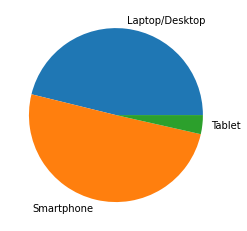

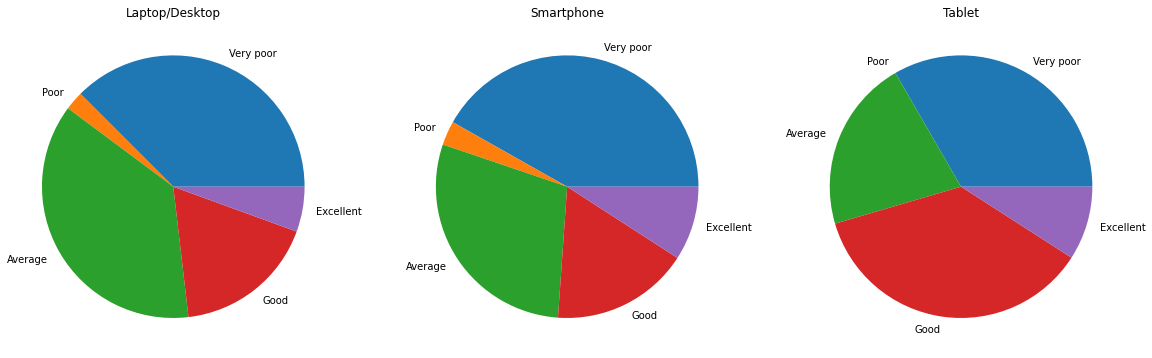

In [17]:
top_list = ["Laptop/Desktop", "Smartphone", "Tablet"]
mediums = df[df["Medium for online class"].isin(top_list)].groupby(["Medium for online class"]).size()
plt.pie(mediums, labels=top_list)
plt.show()
ratings = ["Very poor", "Poor", "Average", "Good", "Excellent"]
fig, ax = plt.subplots(1,3, figsize=(20,20))
for value in top_list:
    df_medium = df[df["Medium for online class"] == value].groupby(["Rating of Online Class experience"]).size()
    ax[top_list.index(value)].pie(df_medium, labels=ratings)
    ax[top_list.index(value)].set_title(value)
plt.show()

Badani podczas e-lekcji korzystają ze smartfonów, komputerów oraz tabletów.
Ku naszemu zdziwieniu, różnica w odbiorze e-zajęć użytkowników smartfonów oraz komputerów jest podobna, z jedynie lekką korzyścią dla komputerów. Użytkownicy tabletów mieli dużo bardziej pozytywne wrażenia, ale ich próbka jest bardzo mała i niereprezentatywna.

## Ciało i motoryka
W mediach często poruszany był temat szybszego postępowania problemu nadwagi w społeczeństwie podczas pandemii. Sprawdzimy jaki wpływ miał COVID-19 na masy hinduskiej młodzieży.

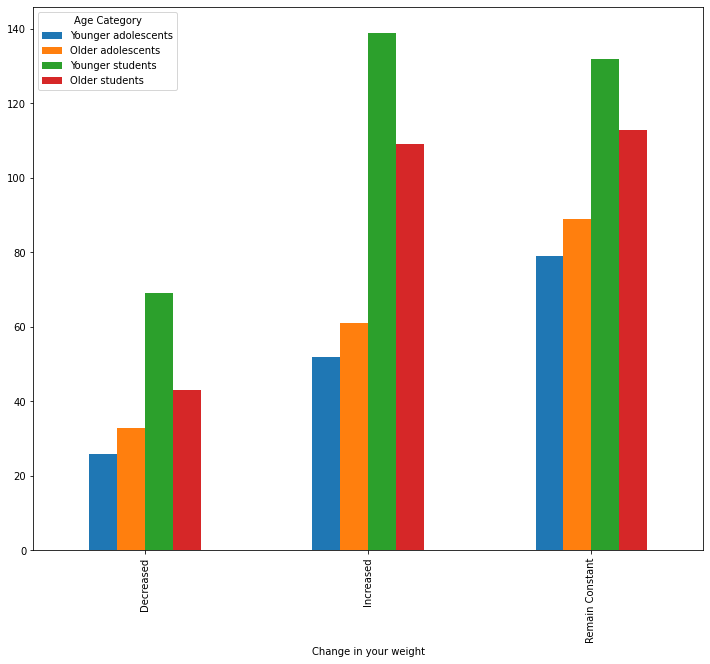

In [18]:
df.groupby(["Age Category", "Change in your weight"]).size().unstack(0).plot(figsize=(12, 10), kind='bar')
plt.show()

Waga znacznej części badanych wzrosła lub się utrzymała. W mniejszości są osoby, które schudły podczas pandemii.

W takim wypadku dobrym pomysłem wydawało się nam sprawdzenie średnich ilości posiłków w trakcie dnia wśród wszystkich grup wiekowych, w celu sprawdzenia występowania ewentualnych anomalii odżywania

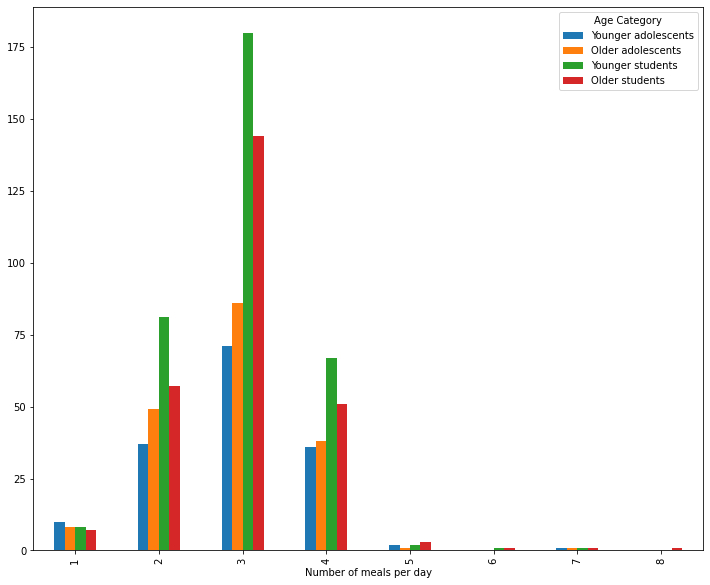

In [19]:
df\
    .groupby(['Age Category', 'Number of meals per day'])\
    .size()\
    .unstack(0)\
    .plot(figsize=(12, 10), kind='bar')
plt.show()

Okazało się, że w każdej grupie wiekowej dominuje model z trzema posiłkami dziennie. Pozostałe przypadki przeważnie konsumują jeden posiłek mniej lub więcej, ale ich liczebność nie przekracza wartości spodziewanych, a proporcje między nimi są wyrównane.

W badaniu otyłości istotne jest również sprawdzenie częstości podejmowania aktywności fizycznej wśród ankietowanych - to tutaj może leżeć powód częstego wzrostu wag

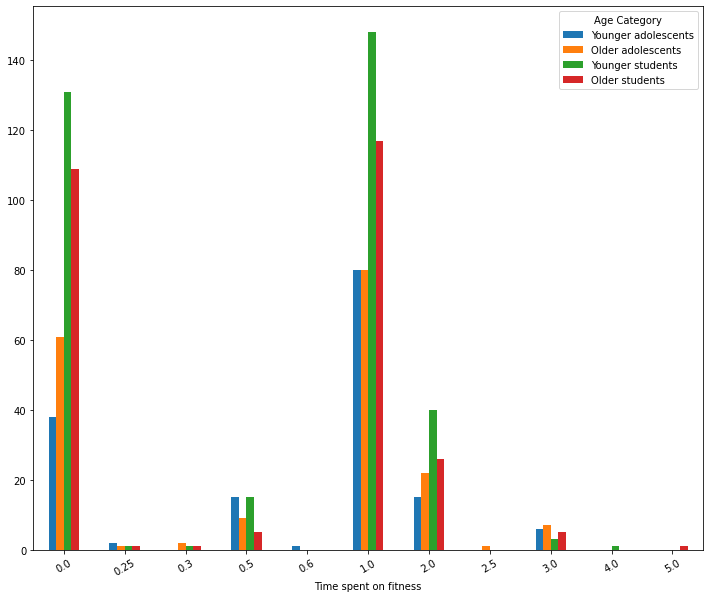

In [20]:
df.groupby(["Age Category", "Time spent on fitness"]).size().unstack(0).plot(figsize=(12, 10), kind='bar', rot=30)
plt.show()

Ludzi w każdej grupie wiekowej można podzielić na dwie, niemal równe części, z czego jedna podejmuje wysiłek godzinę dziennie, a druga nie robi tego wcale. Być może właśnie takie statystyki spowodowały średni wzrost wagi w społeczeństwie.

Mała aktywność fizyczna miała najpewniej negatywny wpływ na przeciętną wagę, czy doprowadziła również do pogorszonego stanu zdrowia wśród młodzieży?

In [21]:
df["Health issue during lockdown"].value_counts()

NO     807
YES    138
Name: Health issue during lockdown, dtype: int64

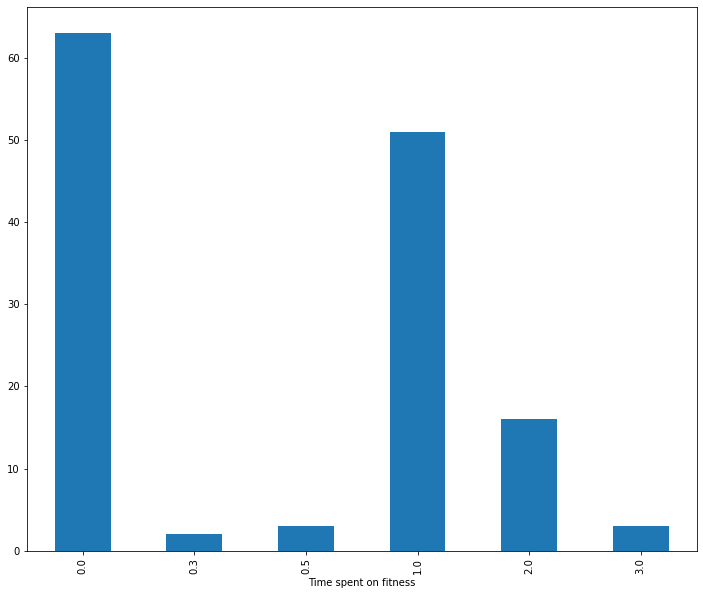

In [22]:
df[df["Health issue during lockdown"]=="YES"].groupby(["Time spent on fitness"]).size().plot(figsize=(12, 10), kind='bar')
plt.show()

Wśród osób z problemami zdrowotnymi znaczna część nie zażywa ruchu wcale.

Sprawdzimy wpływ średniego dziennego snu na kondycję zdrowotną w Indiach.

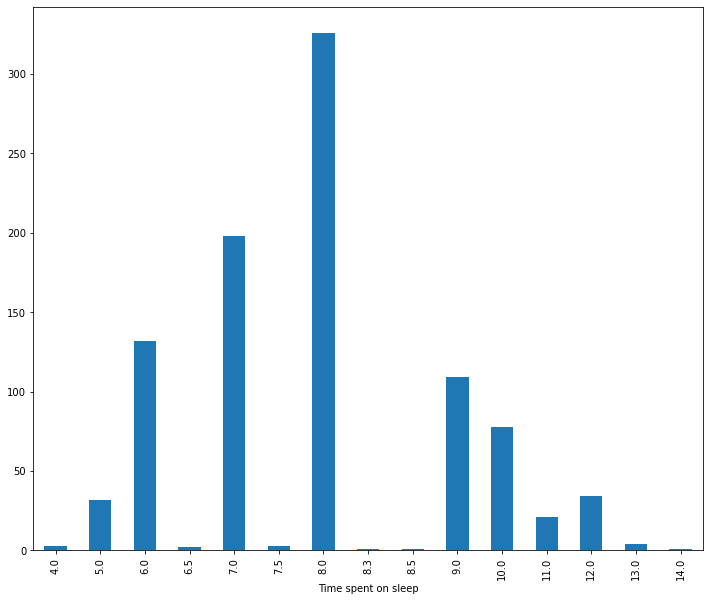

In [23]:
df.groupby(["Time spent on sleep"]).size().plot(figsize=(12, 10), kind='bar')
plt.show()

Rozkład ilości godzin snu wśród badanych nie odbiega od oczekiwań

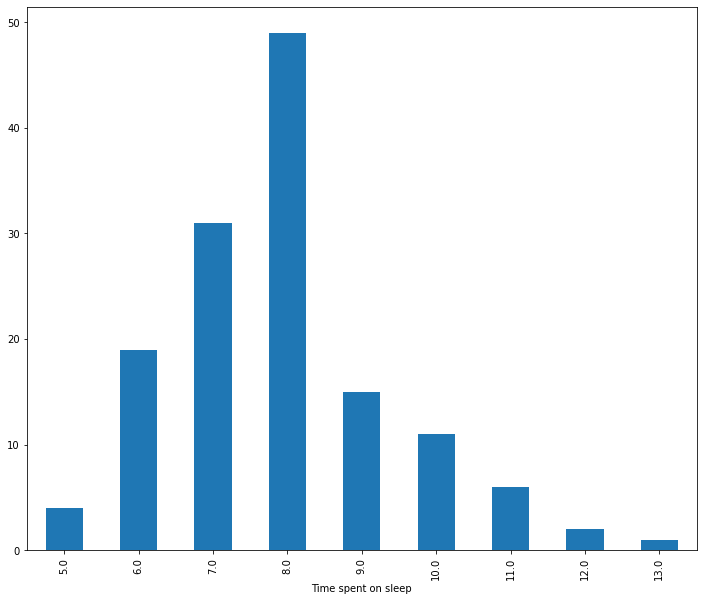

In [24]:
df[df["Health issue during lockdown"]=="YES"].groupby(["Time spent on sleep"]).size().plot(figsize=(12, 10), kind='bar')
plt.show()

Rozkład ilości godzin snu wśród badanych skarżących się na problemy zdrowotne funkcjonalnie pokrywa się z normą w populacji ogólnej. Wynika z tego, że problemy nie wynikały z zaburzeń snu powstałych na skutek pandemii.

## Psychika i samospełnienie
Pandemia wymusiła ograniczenie popularnych wśród młodzieży aktywności. Sprawdzimy, których z nich z największym utęsknieniem wyczekują młodzi hindusi.

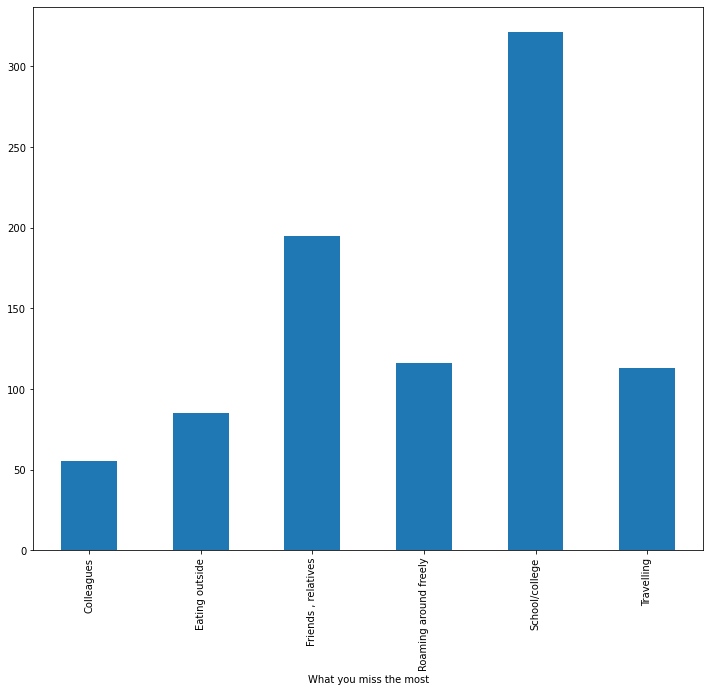

In [25]:
highest = df["What you miss the most"].value_counts()[0:6]
top_values = highest.index.tolist()
df[df["What you miss the most"].isin(top_values)].groupby(["What you miss the most"]).size().plot(figsize=(12, 10), kind='bar')
plt.show()

Najpopularniejszą opcją były zajęcia kontaktowe w szkołach i na uniwersytetach. Tłumaczy to duża niechęć do zajęć zdalnych.

Z powodu pandemii i rezygnacji z wyżej wymienionych czynności dzień przeciętnego ucznia/studenta uległ przeobrażeniu. W jakim stopniu są oni zadowoleni z tego, jak zmienił się ich dzień?

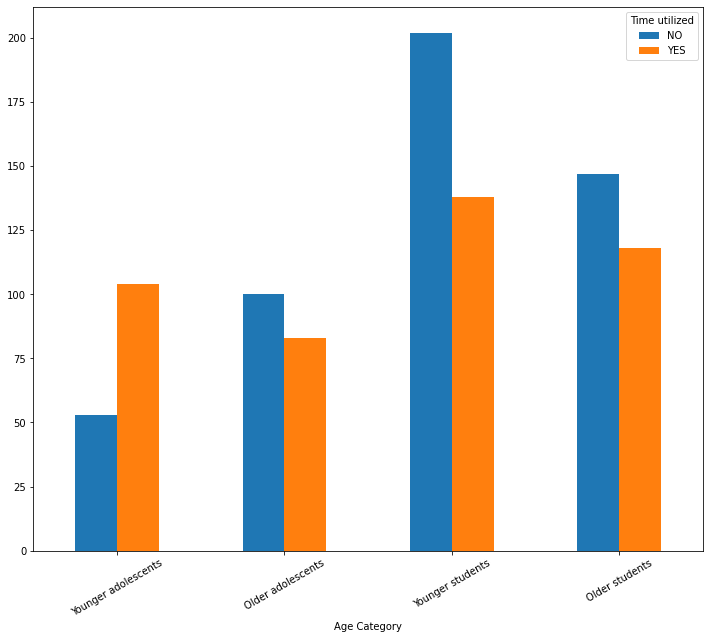

In [26]:
df.groupby(["Age Category", "Time utilized"]).size().unstack(1).plot(figsize=(12, 10), kind='bar', rot=30)
plt.show()

Odpowiedź na to pytanie jest przygnębiająca. Przeważnie zadowolenie można było zaobserwować tylko w najmłodszej grupie wiekowej. Pozostałe, zwłaszcza młodsi studenci, mieli przytłaczające poczucie marnowania czasu i niewykorzysytawania swojego dnia w pełni.

Aby wydedukować, z czego to wynika, należy pochylić się nad sposobami spędzania czasu młodzieży w świetle braku starych alternatyw.

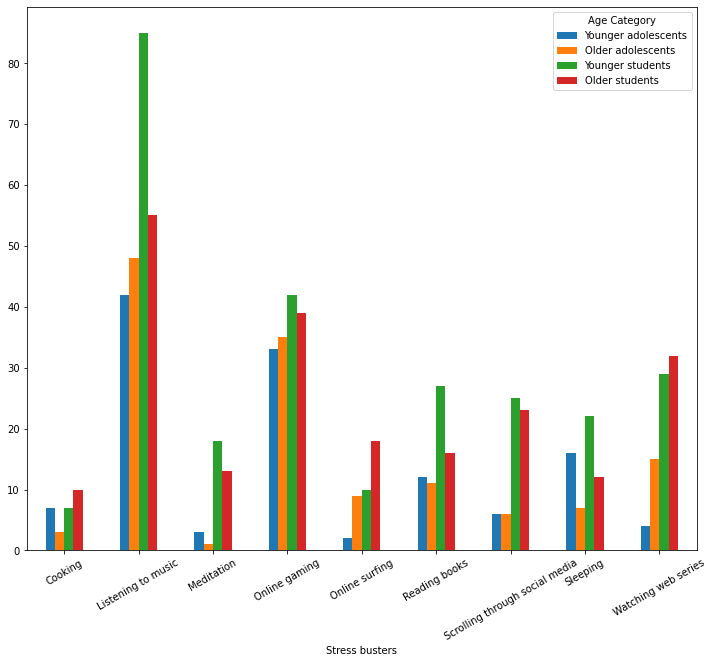

In [33]:
highest = df["Stress busters"].value_counts()
sleeping = highest[5] + highest[8]
high_values = pd.concat(
    [
        highest[0:5],
        pd.Series({"Sleeping":sleeping}),
        highest[6:8],
        pd.Series({"Cooking":highest[9]})
     ]).sort_values(ascending=False)
top_values = high_values.index.tolist()
df[df["Stress busters"].isin(top_values)].groupby(["Age Category", "Stress busters"]).size().unstack(0).plot(figsize=(12, 10), kind='bar', rot=30)
plt.show()

Wśród wszystkich grup wiekowych zdecydowanie wygrały słuchanie muzyki i granie w sieciowe gry komputerowe.
Na trzeciej pozycji, w przypadku studentów i starszych nastolatków, znalazło się oglądanie seriali. Za to młodsi nastolatkowie jako swoją trzecią najbardziej ulubioną formę spędzania czasu wybrali spanie.

Przyjrzymy się zależnościom między kolejnymi metodami odstresowywania i poczuciem bezpowrotnie zmarnowanego czasu.

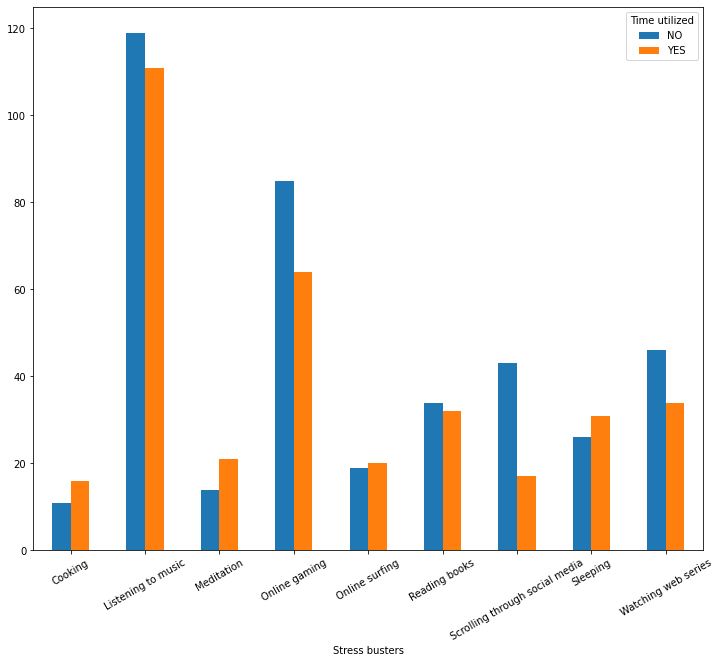

In [28]:
df[df["Stress busters"].isin(top_values)].groupby(["Stress busters", "Time utilized"]).size().unstack(1).plot(figsize=(12, 10), kind='bar', rot=30)
plt.show()

Gry komputerowe i media społecznościowe nie przyniosły ukojenia młodzieży narodu hinduskiego.
Satysfakcja płynęła głównie z rzadko wybieranych form aktywności: gotowania, medytacji i, przede wszystkim, spania.

Formą aktywności, niewymienioną wśród "zabijaczy czasu", było samokształcenie. Spójrzmy, w jakim stopniu okazało się ono satysfakcjonujące w zależności od spędzonego na nie czasu.

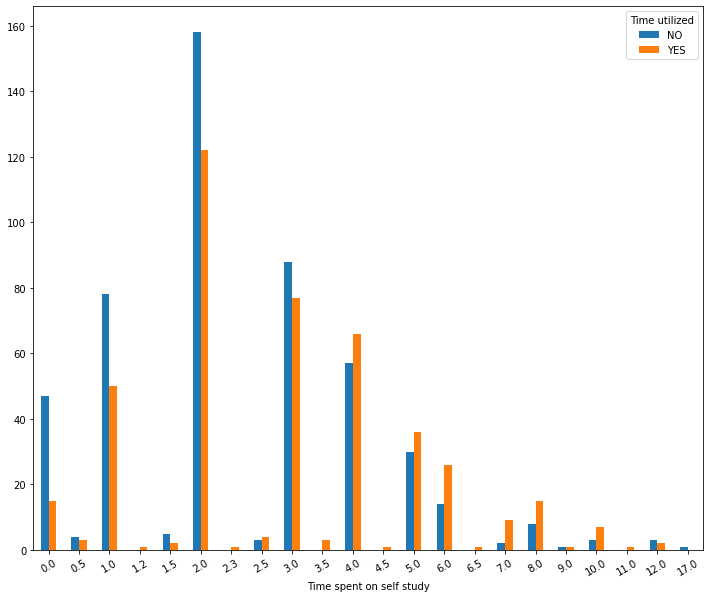

In [29]:
df.groupby(["Time spent on self study", "Time utilized"]).size().unstack(1).plot(figsize=(12, 10), kind='bar', rot=30)
plt.show()

Samokształcenie nie przynosi satysfakcji dla wartości mniejszych niż 3.5h dziennie. Decydujących się na więcej niż 3.5h jest znacznie mniej, ale wyrażają znacznie większe zadowolenie z siebie. Tym większe, im więcej czasu przepracowali. Jest to prawdziwe dla wszystkich wartości poza skrajnymi - 12h i 17h nie przynosi satysfakcji.

Należy zadać sobie pytanie - czy sen, zwłaszcza w dużych ilościach, może powodować niezadowolenie? Odpowiedź na to pytanie wydaje się oczywiste, ale dane wskazują coś zgoła innego.

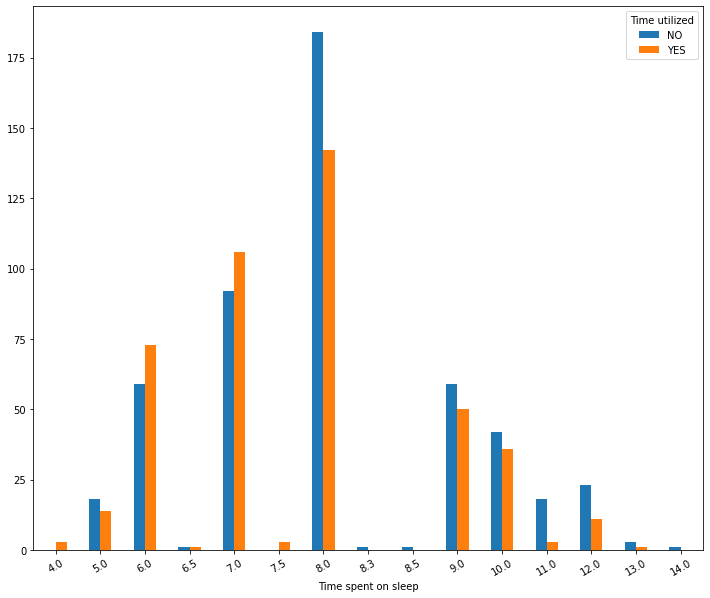

In [30]:
df.groupby(["Time spent on sleep", "Time utilized"]).size().unstack(1).plot(figsize=(12, 10), kind='bar', rot=30)
plt.show()

Okazuje się, że sen dłuższy niż 7.5h wcale nie polepsza samopoczucia, w przeciwieństwie do snu w zakresie 6h-7h, pozostawiającego więcej czasu w trakcie dnia na produktywne aktywności.

Mniej aktywności do wykonania i ograniczenia spotkań z ludźmi "z zewnątrz" mogło spowodować poszukiwanie silniejszych więzi społecznych w swoim najbliższym otoczeniu i rodzinie.

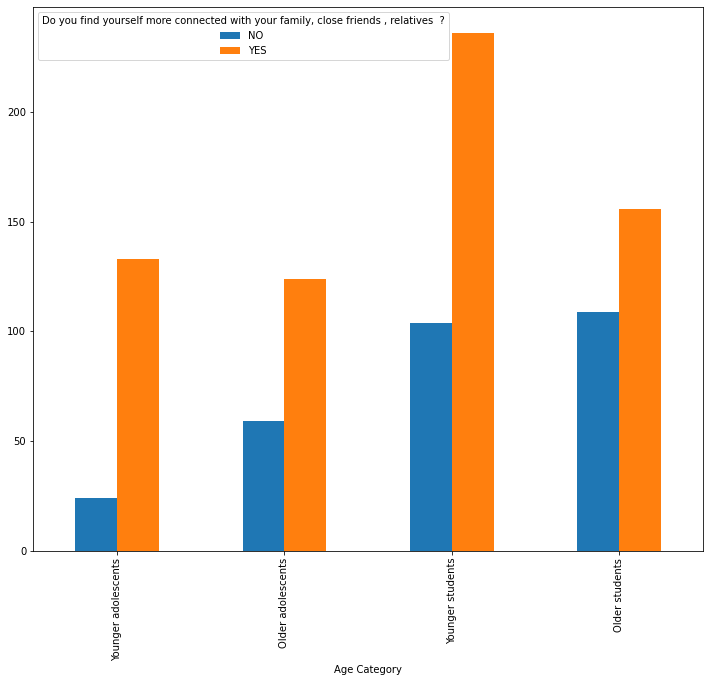

In [31]:
df.groupby(['Age Category', 'Do you find yourself more connected with your family, close friends , relatives  ?']).size().unstack(1).plot(figsize=(12, 10), kind='bar')
plt.show()

Wychodzi na to, że było to prawdziwe dla każdej grupy wiekowej, szczególnie dla najmłodszych nastolatków.